In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [128]:
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')
data.shape

(5000, 21)

In [129]:
data.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [130]:
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [131]:
categorical_variables = [
    x for x in data.columns if data[x].dtype == 'object' or x == 'area_code'
]
categorical_variables

['state', 'area_code', 'phone_number', 'intl_plan', 'voice_mail_plan']

In [132]:
for var in categorical_variables:
    print('%s: '%var, '%d categorias'%len(data[var].unique()))
    print(data[var].unique(),'\n')
    
#phone number will not be used for obvious reasons    
#states will not be used

state:  51 categorias
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

area_code:  3 categorias
[415 408 510] 

phone_number:  5000 categorias
['382-4657' '371-7191' '358-1921' ... '333-6861' '394-2206' '373-8058'] 

intl_plan:  2 categorias
['no' 'yes'] 

voice_mail_plan:  2 categorias
['yes' 'no'] 



In [133]:
data= data.drop(['state','phone_number'],axis = 1)

In [134]:
#using one-hot-encoding
data = pd.get_dummies(data,columns=['area_code'])
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,area_code_408,area_code_415,area_code_510
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0


In [135]:
#binarizing "intl_plan" and "voice_mail_plan"
binarizer = LabelBinarizer()
for v in ["intl_plan", "voice_mail_plan"]:
    data[v] = binarizer.fit_transform(data[v])
data.head()    

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0


In [136]:
data['churned'].value_counts()

False    4293
True      707
Name: churned, dtype: int64

In [137]:
#verify the average value for each attribute in each churned class
data.groupby(['churned']).mean()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
churned,,,,,,,,,,,,,,,,,,,,
False,99.917074,0.063825,0.284416,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722,0.252038,0.500582,0.247379
True,102.332390,0.281471,0.144272,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597,0.250354,0.489392,0.260255


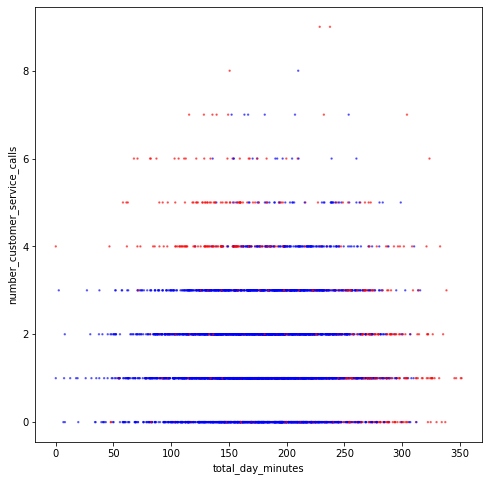

In [138]:
#dispersion diagram
att1 = 'total_day_minutes'
att2 = 'number_customer_service_calls'#total_eve_minutes
colors = ['red' if x else 'blue' for x in data['churned']]

graph = data.plot.scatter(att1,att2, c = colors, s=2,alpha=0.5, figsize=(8,8))
plt.show()

In [139]:
#selecting features that will be used
selected_features = ['account_length', 
                     'intl_plan',
                     'voice_mail_plan',
                     'number_vmail_messages',
                     'total_day_minutes',
                     'total_day_calls',
                     'total_day_charge',
                     'total_eve_minutes',
                     'total_eve_calls',
                     'total_eve_charge',
                     'total_night_minutes', 
                     'total_night_calls',
                     'total_night_charge',
                     'total_intl_minutes',
                     'total_intl_calls',
                     'total_intl_charge',
                     'number_customer_service_calls',
                     #'area_code_408',
                     #'area_code_415',
                     #'area_code_510'
                     'churned'
                    ]
target = 'churned'

data = data[selected_features]

In [140]:
#pd.sample
#shuffle the data
shuffle_data = data.sample(frac = 1,random_state = 12345)
shuffle_data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
3183,95,0,0,0,157.3,116,26.74,197.5,77,16.79,128.2,111,5.77,8.4,4,2.27,2,False
1071,134,0,0,0,205.3,122,34.90,240.5,155,20.44,179.1,107,8.06,5.0,9,1.35,1,False
2640,105,0,1,24,274.7,99,46.70,193.5,118,16.45,299.6,109,13.48,10.8,3,2.92,3,False
2282,140,0,0,0,149.7,71,25.45,212.5,97,18.06,245.9,67,11.07,12.6,4,3.40,3,False
1595,83,0,0,0,178.8,102,30.40,167.9,84,14.27,178.9,65,8.05,8.6,4,2.32,3,False


In [141]:
X = shuffle_data.loc[:,shuffle_data.columns != 'churned'].values 
Y = shuffle_data.loc[:,shuffle_data.columns == 'churned'].values

In [142]:
#creating train and test arrays
q = 4000
X_train = X[:q,:]
Y_train = Y[:q].ravel()

X_test = X[q:,:]
Y_test = Y[q:].ravel()#flat 

In [143]:
#changing the scale
transformer = StandardScaler()
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [144]:
#predictions
classificator = KNeighborsClassifier(n_neighbors=10)
classificator = classificator.fit(X_train, Y_train)

Y_pred_train = classificator.predict(X_train)
Y_pred_test = classificator.predict(X_test)

In [145]:
#metrics
acc_train = sum(Y_pred_train == Y_train) / len(Y_train)
acc_test = sum(Y_pred_test == Y_test) / len(Y_test)

print(acc_train, acc_test)

0.90225 0.863


In [146]:
def knn(X_train, Y_train, X_test, Y_test,n):
    classificator = KNeighborsClassifier(n_neighbors=n, weights = 'uniform',p=1) #p=1 is manhattan distance
    classificator = classificator.fit(X_train, Y_train)

    Y_pred_train = classificator.predict(X_train)
    Y_pred_test = classificator.predict(X_test) 
    
    #metrics
    acc_train = (sum(Y_pred_train == Y_train) / len(Y_train)) * 100 
    acc_test = (sum(Y_pred_test == Y_test) / len(Y_test)) * 100
    
    return acc_train, acc_test

<Figure size 720x576 with 0 Axes>

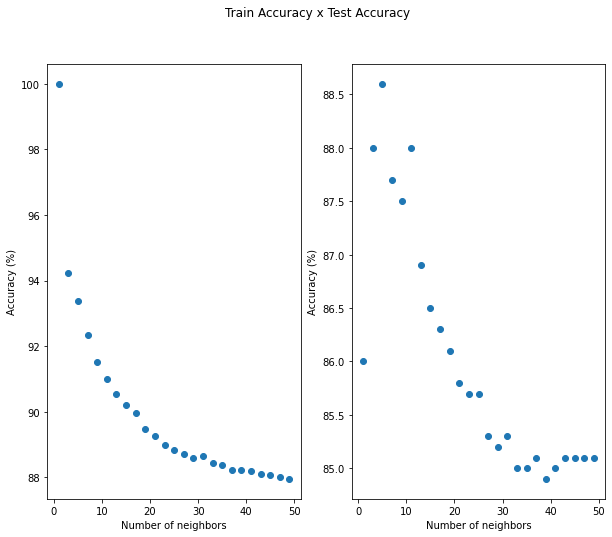

In [147]:
test_acc_arr = []
train_acc_arr = []

for key in range(1,50,2):
    
    acc_train, acc_test = knn(X_train, Y_train, X_test, Y_test, key)
    test_acc_arr.append(acc_test)
    train_acc_arr.append(acc_train)

X = range(1,50,2) 
fig = plt.figure(figsize = (10,8))
fig, axs = plt.subplots(1, 2, figsize = (10,8))

axs[0].plot(X,train_acc_arr,'o') 

axs[1].plot(X,test_acc_arr,'o') 


for ax in axs.flat:
    ax.set(xlabel='Number of neighbors', ylabel='Accuracy (%)')

fig.suptitle('Train Accuracy x Test Accuracy')

plt.show()    

In [148]:
#maximum accuracy
np.max(test_acc_arr)

88.6